In [127]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

In [128]:
#x = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #impulse
#x = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
                                              #
x = np.zeros(2**7).astype(int)
x = np.append(x, 8191).astype(int)
x = np.append(x, 4092).astype(int)
x1 = np.zeros(2**7 - 1).astype(int)
x = np.append(x, x1)
print(x.size)
feedback = 0

257


In [129]:
out = np.zeros(2**8 + 1).astype(int)
acc1 = 0
acc2 = 0
for i in range (0, 2**8 + 1):
    #KOSINUSOIDA
    F = np.arange(0,2**8 + 1)
    x[i] = 2048*np.cos(F[i]/20)
    
    if(i == 0):
        feedback = 0
    else:
        feedback = out[i-1]
        #print(out[i-1])
        '''                     # KOMENTAR
        out_abs = abs(out[i-1])
        if(out_abs==1):
            feedback = 512
        if(out_abs==2):
            feedback = 1024*2**0
        if(out_abs==3):
            feedback = 1024*2**1
        if(out_abs==4):
            feedback = 1024*2**2
        if(out_abs==5):
            feedback = 1024*2**3
        if(out_abs==6):
            feedback = 1024*2**4
        if(out_abs==7):
            feedback = 1024*2**5
        #feedback = 1024*2**(2*out_abs - 1)
        if(out[i-1]<0):
            feedback = -1*feedback
        '''
    out14 = x[i] - 2*feedback + acc1 + acc2
    acc1 = x[i] - feedback + acc1
    acc2 = x[i] - 2*feedback + acc1 + acc2
    #print(out14)
    #print(feedback)
    
    out14_bin = bin(out14)
    #print(len(out14_bin))
    #print(out14_bin)
    
    #Da bi svi bili 14 bita
    if((out14 > 0) and (len(out14_bin) < 14)):
        out14_bin = "0b" + (14 - len(out14_bin))*"0" + out14_bin[2:]
    if((out14 < 0) and (len(out14_bin) < 15)):
        out14_bin = "-0b" + (14 - len(out14_bin))*"0" + out14_bin[3:]
    #print(out14_bin)   
    
    if(out14_bin == "0b0"):
        out14_bin = "0b00000000"
        out_bin = 0
    if(out14 > 0):
        out_bin = int(out14_bin[2:5],2)
        #Pozitivan broj 0bXXXX
        #print(out14_bin)
    if(out14 < 0):
        out_bin = int(out14_bin[3:6],2)
        #Negativan broj -0bXXXX
    
    if(out14 < 0):
        out_bin = out_bin * (-1)
    out[i] = int(out_bin)    

In [130]:
#out

In [131]:
X = fft(x)
Y = fft(out[:])
#abs(X)

In [132]:
H = Y/X #prenosna funkcija
#H = Y/92
Hdb = 20*np.log(abs(H))
len(Hdb)

257

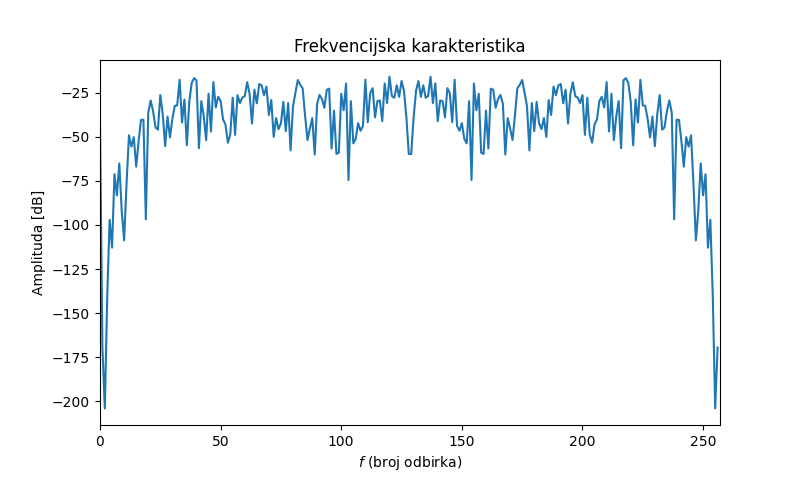

In [133]:
F = np.arange(0,2**8 + 1)
plt.figure(figsize=(8,5))
plt.title("Frekvencijska karakteristika")
plt.xlabel('$f$ (broj odbirka)')
plt.ylabel('Amplituda [dB]')
plt.subplots_adjust(bottom=0.15)
plt.xlim([0,2**8 + 1])
plt.plot(F,Hdb);
plt.show();

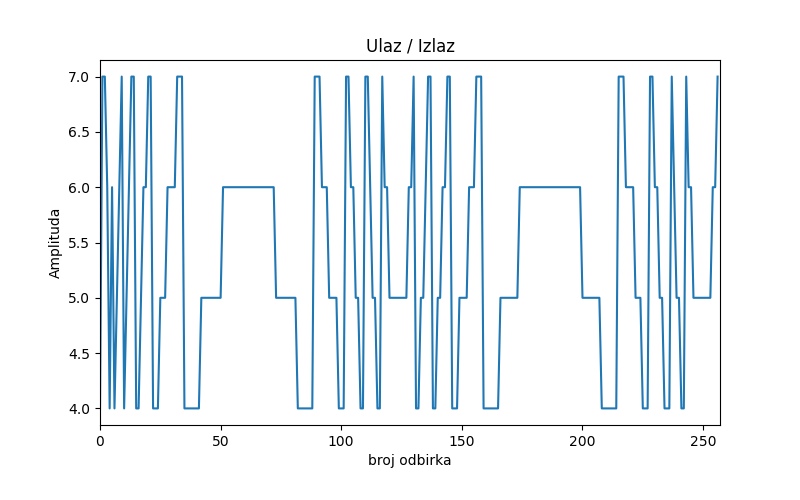

In [134]:
F = np.arange(0,2**8 + 1)
plt.figure(figsize=(8,5))
plt.title("Ulaz / Izlaz")
plt.xlabel('broj odbirka')
plt.ylabel('Amplituda')
plt.subplots_adjust(bottom=0.15)
plt.xlim([0,2**8 + 1])
#plt.xlim([254,259])
#plt.plot(F,x)
plt.plot(F,out)
plt.show();

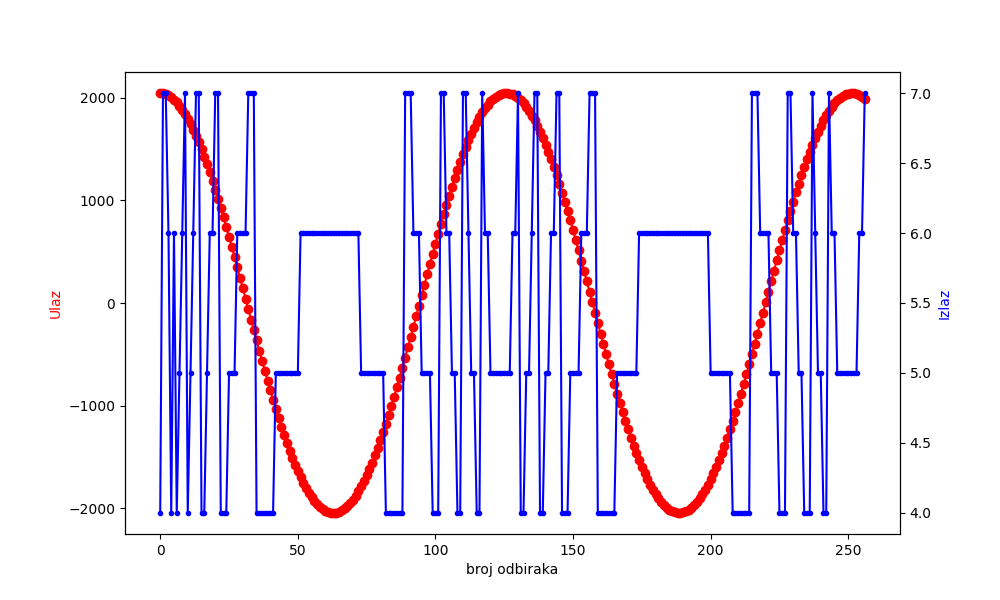

In [135]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(F,x, color="red", marker="o")
# set x-axis label
ax.set_xlabel("broj odbiraka")
# set y-axis label
ax.set_ylabel("Ulaz", color="red")

ax2=ax.twinx()
ax2.plot(F, out,color="blue", marker=".")
ax2.set_ylabel("Izlaz",color="blue")
plt.show()

In [74]:
z = "1b1010"
len(z)

'1b1010'

In [77]:
z = "0b" + 2*"10"
z

'0b1010'